In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: IFF
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


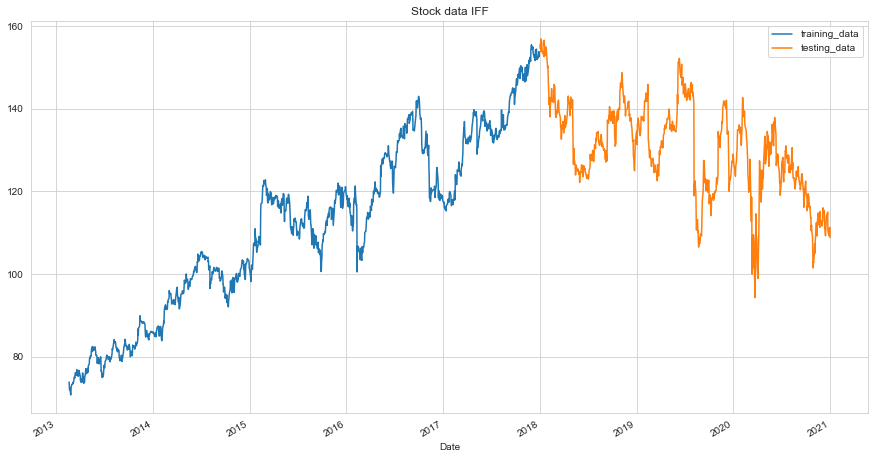

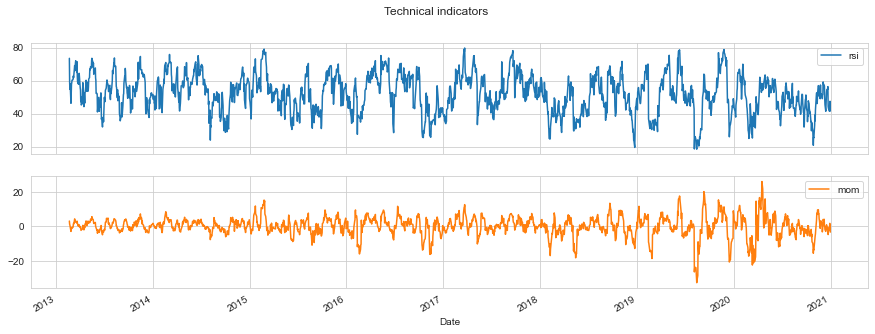

In [2]:
stock_name = 'iff'.upper()
industry = 'Basic Materials'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1370.83, duration: 0:00:00.267059
episode: 2/2000, episode end value: 1375.04, duration: 0:00:00.275060
episode: 3/2000, episode end value: 1389.14, duration: 0:00:00.242055
episode: 4/2000, episode end value: 1377.42, duration: 0:00:00.249055
episode: 5/2000, episode end value: 1375.33, duration: 0:00:00.248054
episode: 6/2000, episode end value: 1388.21, duration: 0:00:00.233065
episode: 7/2000, episode end value: 1384.71, duration: 0:00:00.223034
episode: 8/2000, episode end value: 1370.90, duration: 0:00:00.214055
episode: 9/2000, episode end value: 1370.00, duration: 0:00:00.212034
episode: 10/2000, episode end value: 1367.30, duration: 0:00:00.206044
episode: 11/2000, episode end value: 1374.91, duration: 0:00:00.200056
episode: 12/2000, episode end value: 1374.27, duration: 0:00:00.219033
episode: 13/2000, episode end value: 1386.85, duration: 0:00:00.209071
episode: 14/2000, episode end value: 1360.53, duration: 0:00:00.215659
episode: 15/200

episode: 117/2000, episode end value: 1389.01, duration: 0:00:00.190046
episode: 118/2000, episode end value: 1338.54, duration: 0:00:00.203050
episode: 119/2000, episode end value: 1369.29, duration: 0:00:00.226041
episode: 120/2000, episode end value: 1377.67, duration: 0:00:00.219051
episode: 121/2000, episode end value: 1401.58, duration: 0:00:00.231051
episode: 122/2000, episode end value: 1354.42, duration: 0:00:00.233053
episode: 123/2000, episode end value: 1368.13, duration: 0:00:00.258056
episode: 124/2000, episode end value: 1388.37, duration: 0:00:00.228050
episode: 125/2000, episode end value: 1374.40, duration: 0:00:00.238054
episode: 126/2000, episode end value: 1384.55, duration: 0:00:00.242053
episode: 127/2000, episode end value: 1367.76, duration: 0:00:00.254060
episode: 128/2000, episode end value: 1396.46, duration: 0:00:00.238052
episode: 129/2000, episode end value: 1394.08, duration: 0:00:00.270061
episode: 130/2000, episode end value: 1351.22, duration: 0:00:00

episode: 231/2000, episode end value: 1377.04, duration: 0:00:00.251056
episode: 232/2000, episode end value: 1385.92, duration: 0:00:00.286065
episode: 233/2000, episode end value: 1372.93, duration: 0:00:00.246055
episode: 234/2000, episode end value: 1383.28, duration: 0:00:00.270067
episode: 235/2000, episode end value: 1357.34, duration: 0:00:00.264054
episode: 236/2000, episode end value: 1376.39, duration: 0:00:00.273059
episode: 237/2000, episode end value: 1373.51, duration: 0:00:00.267061
episode: 238/2000, episode end value: 1364.37, duration: 0:00:00.276063
episode: 239/2000, episode end value: 1387.44, duration: 0:00:00.266057
episode: 240/2000, episode end value: 1368.38, duration: 0:00:00.305082
episode: 241/2000, episode end value: 1383.77, duration: 0:00:00.304957
episode: 242/2000, episode end value: 1368.53, duration: 0:00:00.365080
episode: 243/2000, episode end value: 1371.70, duration: 0:00:00.307069
episode: 244/2000, episode end value: 1390.50, duration: 0:00:00

episode: 345/2000, episode end value: 1395.22, duration: 0:00:00.331075
episode: 346/2000, episode end value: 1401.52, duration: 0:00:00.309070
episode: 347/2000, episode end value: 1417.04, duration: 0:00:00.320073
episode: 348/2000, episode end value: 1385.07, duration: 0:00:00.275061
episode: 349/2000, episode end value: 1367.56, duration: 0:00:00.289065
episode: 350/2000, episode end value: 1399.33, duration: 0:00:00.353080
episode: 351/2000, episode end value: 1352.31, duration: 0:00:00.366081
episode: 352/2000, episode end value: 1370.92, duration: 0:00:00.374084
episode: 353/2000, episode end value: 1353.79, duration: 0:00:00.445309
episode: 354/2000, episode end value: 1382.01, duration: 0:00:00.358758
episode: 355/2000, episode end value: 1387.89, duration: 0:00:00.344074
episode: 356/2000, episode end value: 1345.44, duration: 0:00:00.308069
episode: 357/2000, episode end value: 1394.94, duration: 0:00:00.353653
episode: 358/2000, episode end value: 1361.90, duration: 0:00:00

episode: 459/2000, episode end value: 1356.67, duration: 0:00:00.493110
episode: 460/2000, episode end value: 1368.91, duration: 0:00:00.451101
episode: 461/2000, episode end value: 1363.82, duration: 0:00:00.437101
episode: 462/2000, episode end value: 1365.41, duration: 0:00:00.449102
episode: 463/2000, episode end value: 1355.12, duration: 0:00:00.452102
episode: 464/2000, episode end value: 1370.39, duration: 0:00:00.448100
episode: 465/2000, episode end value: 1369.85, duration: 0:00:00.395093
episode: 466/2000, episode end value: 1355.52, duration: 0:00:00.466111
episode: 467/2000, episode end value: 1374.11, duration: 0:00:00.493114
episode: 468/2000, episode end value: 1370.21, duration: 0:00:00.549125
episode: 469/2000, episode end value: 1365.30, duration: 0:00:00.497111
episode: 470/2000, episode end value: 1365.75, duration: 0:00:00.473113
episode: 471/2000, episode end value: 1361.19, duration: 0:00:00.457100
episode: 472/2000, episode end value: 1363.52, duration: 0:00:00

episode: 573/2000, episode end value: 1366.13, duration: 0:00:00.476106
episode: 574/2000, episode end value: 1357.39, duration: 0:00:00.418097
episode: 575/2000, episode end value: 1369.68, duration: 0:00:00.454103
episode: 576/2000, episode end value: 1373.06, duration: 0:00:00.511109
episode: 577/2000, episode end value: 1372.70, duration: 0:00:00.458101
episode: 578/2000, episode end value: 1370.57, duration: 0:00:00.475109
episode: 579/2000, episode end value: 1364.90, duration: 0:00:00.449103
episode: 580/2000, episode end value: 1368.54, duration: 0:00:00.433099
episode: 581/2000, episode end value: 1363.72, duration: 0:00:00.400090
episode: 582/2000, episode end value: 1365.70, duration: 0:00:00.440951
episode: 583/2000, episode end value: 1362.59, duration: 0:00:00.432775
episode: 584/2000, episode end value: 1362.53, duration: 0:00:00.465105
episode: 585/2000, episode end value: 1367.21, duration: 0:00:00.431095
episode: 586/2000, episode end value: 1365.78, duration: 0:00:00

episode: 687/2000, episode end value: 1368.26, duration: 0:00:00.418089
episode: 688/2000, episode end value: 1362.71, duration: 0:00:00.479111
episode: 689/2000, episode end value: 1363.60, duration: 0:00:00.459102
episode: 690/2000, episode end value: 1372.18, duration: 0:00:00.518116
episode: 691/2000, episode end value: 1373.86, duration: 0:00:00.520115
episode: 692/2000, episode end value: 1368.80, duration: 0:00:00.389091
episode: 693/2000, episode end value: 1364.35, duration: 0:00:00.467103
episode: 694/2000, episode end value: 1365.12, duration: 0:00:00.484107
episode: 695/2000, episode end value: 1373.31, duration: 0:00:00.451106
episode: 696/2000, episode end value: 1370.57, duration: 0:00:00.465105
episode: 697/2000, episode end value: 1361.16, duration: 0:00:00.485110
episode: 698/2000, episode end value: 1369.62, duration: 0:00:00.455103
episode: 699/2000, episode end value: 1362.17, duration: 0:00:00.441100
episode: 700/2000, episode end value: 1372.06, duration: 0:00:00

episode: 801/2000, episode end value: 1373.11, duration: 0:00:00.486109
episode: 802/2000, episode end value: 1370.16, duration: 0:00:00.493116
episode: 803/2000, episode end value: 1362.69, duration: 0:00:00.484107
episode: 804/2000, episode end value: 1364.61, duration: 0:00:00.455100
episode: 805/2000, episode end value: 1362.04, duration: 0:00:00.510116
episode: 806/2000, episode end value: 1372.28, duration: 0:00:00.522116
episode: 807/2000, episode end value: 1367.28, duration: 0:00:00.473109
episode: 808/2000, episode end value: 1363.35, duration: 0:00:00.480109
episode: 809/2000, episode end value: 1364.99, duration: 0:00:00.458106
episode: 810/2000, episode end value: 1364.81, duration: 0:00:00.499113
episode: 811/2000, episode end value: 1366.46, duration: 0:00:00.466102
episode: 812/2000, episode end value: 1366.79, duration: 0:00:00.476108
episode: 813/2000, episode end value: 1370.70, duration: 0:00:00.465105
episode: 814/2000, episode end value: 1370.55, duration: 0:00:00

episode: 915/2000, episode end value: 1359.76, duration: 0:00:00.542127
episode: 916/2000, episode end value: 1372.61, duration: 0:00:00.561126
episode: 917/2000, episode end value: 1368.66, duration: 0:00:00.541122
episode: 918/2000, episode end value: 1371.91, duration: 0:00:00.521122
episode: 919/2000, episode end value: 1371.94, duration: 0:00:00.538126
episode: 920/2000, episode end value: 1373.75, duration: 0:00:00.566125
episode: 921/2000, episode end value: 1371.27, duration: 0:00:00.511113
episode: 922/2000, episode end value: 1365.69, duration: 0:00:00.539127
episode: 923/2000, episode end value: 1361.01, duration: 0:00:00.511111
episode: 924/2000, episode end value: 1361.69, duration: 0:00:00.528118
episode: 925/2000, episode end value: 1363.11, duration: 0:00:00.546124
episode: 926/2000, episode end value: 1372.06, duration: 0:00:00.511115
episode: 927/2000, episode end value: 1367.51, duration: 0:00:00.517705
episode: 928/2000, episode end value: 1364.48, duration: 0:00:00

episode: 1029/2000, episode end value: 1363.79, duration: 0:00:00.439672
episode: 1030/2000, episode end value: 1363.42, duration: 0:00:00.427285
episode: 1031/2000, episode end value: 1368.75, duration: 0:00:00.489536
episode: 1032/2000, episode end value: 1355.15, duration: 0:00:00.456163
episode: 1033/2000, episode end value: 1366.13, duration: 0:00:00.509114
episode: 1034/2000, episode end value: 1362.40, duration: 0:00:00.533120
episode: 1035/2000, episode end value: 1357.40, duration: 0:00:00.505113
episode: 1036/2000, episode end value: 1367.04, duration: 0:00:00.443099
episode: 1037/2000, episode end value: 1364.19, duration: 0:00:00.465110
episode: 1038/2000, episode end value: 1353.75, duration: 0:00:00.438099
episode: 1039/2000, episode end value: 1368.02, duration: 0:00:00.423091
episode: 1040/2000, episode end value: 1372.41, duration: 0:00:00.484108
episode: 1041/2000, episode end value: 1374.01, duration: 0:00:00.491560
episode: 1042/2000, episode end value: 1369.66, dur

episode: 1142/2000, episode end value: 1373.04, duration: 0:00:00.480115
episode: 1143/2000, episode end value: 1371.66, duration: 0:00:00.479108
episode: 1144/2000, episode end value: 1370.71, duration: 0:00:00.523115
episode: 1145/2000, episode end value: 1365.59, duration: 0:00:00.469107
episode: 1146/2000, episode end value: 1361.96, duration: 0:00:00.461105
episode: 1147/2000, episode end value: 1366.61, duration: 0:00:00.465105
episode: 1148/2000, episode end value: 1353.78, duration: 0:00:00.460106
episode: 1149/2000, episode end value: 1369.36, duration: 0:00:00.465105
episode: 1150/2000, episode end value: 1365.54, duration: 0:00:00.517116
episode: 1151/2000, episode end value: 1362.40, duration: 0:00:00.459083
episode: 1152/2000, episode end value: 1360.66, duration: 0:00:00.529112
episode: 1153/2000, episode end value: 1366.57, duration: 0:00:00.493113
episode: 1154/2000, episode end value: 1360.95, duration: 0:00:00.438096
episode: 1155/2000, episode end value: 1353.90, dur

episode: 1255/2000, episode end value: 1369.62, duration: 0:00:00.505113
episode: 1256/2000, episode end value: 1374.16, duration: 0:00:00.456102
episode: 1257/2000, episode end value: 1373.63, duration: 0:00:00.444100
episode: 1258/2000, episode end value: 1364.31, duration: 0:00:00.443100
episode: 1259/2000, episode end value: 1368.00, duration: 0:00:00.435095
episode: 1260/2000, episode end value: 1366.22, duration: 0:00:00.442100
episode: 1261/2000, episode end value: 1370.83, duration: 0:00:00.462102
episode: 1262/2000, episode end value: 1372.11, duration: 0:00:00.467105
episode: 1263/2000, episode end value: 1370.75, duration: 0:00:00.443104
episode: 1264/2000, episode end value: 1371.10, duration: 0:00:00.475102
episode: 1265/2000, episode end value: 1368.54, duration: 0:00:00.430091
episode: 1266/2000, episode end value: 1364.64, duration: 0:00:00.464105
episode: 1267/2000, episode end value: 1373.76, duration: 0:00:00.485624
episode: 1268/2000, episode end value: 1363.26, dur

episode: 1368/2000, episode end value: 1365.23, duration: 0:00:00.465111
episode: 1369/2000, episode end value: 1351.82, duration: 0:00:00.463099
episode: 1370/2000, episode end value: 1367.86, duration: 0:00:00.465645
episode: 1371/2000, episode end value: 1360.43, duration: 0:00:00.475197
episode: 1372/2000, episode end value: 1373.43, duration: 0:00:00.497113
episode: 1373/2000, episode end value: 1370.29, duration: 0:00:00.588683
episode: 1374/2000, episode end value: 1367.00, duration: 0:00:00.544119
episode: 1375/2000, episode end value: 1363.21, duration: 0:00:00.538122
episode: 1376/2000, episode end value: 1363.46, duration: 0:00:00.436098
episode: 1377/2000, episode end value: 1370.73, duration: 0:00:00.497114
episode: 1378/2000, episode end value: 1358.45, duration: 0:00:00.432095
episode: 1379/2000, episode end value: 1368.86, duration: 0:00:00.421095
episode: 1380/2000, episode end value: 1366.42, duration: 0:00:00.437102
episode: 1381/2000, episode end value: 1363.67, dur

episode: 1481/2000, episode end value: 1367.06, duration: 0:00:00.433100
episode: 1482/2000, episode end value: 1354.87, duration: 0:00:00.478102
episode: 1483/2000, episode end value: 1369.45, duration: 0:00:00.411098
episode: 1484/2000, episode end value: 1366.18, duration: 0:00:00.447098
episode: 1485/2000, episode end value: 1370.99, duration: 0:00:00.463103
episode: 1486/2000, episode end value: 1364.41, duration: 0:00:00.445101
episode: 1487/2000, episode end value: 1368.32, duration: 0:00:00.489108
episode: 1488/2000, episode end value: 1371.09, duration: 0:00:00.450100
episode: 1489/2000, episode end value: 1360.58, duration: 0:00:00.472104
episode: 1490/2000, episode end value: 1366.87, duration: 0:00:00.465105
episode: 1491/2000, episode end value: 1368.54, duration: 0:00:00.469099
episode: 1492/2000, episode end value: 1372.03, duration: 0:00:00.518118
episode: 1493/2000, episode end value: 1368.22, duration: 0:00:00.498110
episode: 1494/2000, episode end value: 1364.05, dur

episode: 1594/2000, episode end value: 1369.71, duration: 0:00:00.447103
episode: 1595/2000, episode end value: 1367.29, duration: 0:00:00.500113
episode: 1596/2000, episode end value: 1363.27, duration: 0:00:00.451103
episode: 1597/2000, episode end value: 1355.04, duration: 0:00:00.451101
episode: 1598/2000, episode end value: 1373.71, duration: 0:00:00.456101
episode: 1599/2000, episode end value: 1370.01, duration: 0:00:00.426096
episode: 1600/2000, episode end value: 1365.56, duration: 0:00:00.452102
episode: 1601/2000, episode end value: 1365.59, duration: 0:00:00.462102
episode: 1602/2000, episode end value: 1364.99, duration: 0:00:00.504118
episode: 1603/2000, episode end value: 1369.27, duration: 0:00:00.437099
episode: 1604/2000, episode end value: 1354.62, duration: 0:00:00.460103
episode: 1605/2000, episode end value: 1364.38, duration: 0:00:00.449098
episode: 1606/2000, episode end value: 1354.24, duration: 0:00:00.454100
episode: 1607/2000, episode end value: 1365.41, dur

episode: 1707/2000, episode end value: 1364.39, duration: 0:00:00.404098
episode: 1708/2000, episode end value: 1362.94, duration: 0:00:00.393088
episode: 1709/2000, episode end value: 1361.65, duration: 0:00:00.392086
episode: 1710/2000, episode end value: 1352.70, duration: 0:00:00.388086
episode: 1711/2000, episode end value: 1366.57, duration: 0:00:00.478110
episode: 1712/2000, episode end value: 1364.35, duration: 0:00:00.444098
episode: 1713/2000, episode end value: 1372.83, duration: 0:00:00.384089
episode: 1714/2000, episode end value: 1349.95, duration: 0:00:00.450096
episode: 1715/2000, episode end value: 1368.37, duration: 0:00:00.402095
episode: 1716/2000, episode end value: 1354.12, duration: 0:00:00.462102
episode: 1717/2000, episode end value: 1363.92, duration: 0:00:00.517116
episode: 1718/2000, episode end value: 1356.82, duration: 0:00:00.521114
episode: 1719/2000, episode end value: 1371.25, duration: 0:00:00.469104
episode: 1720/2000, episode end value: 1373.66, dur

episode: 1820/2000, episode end value: 1372.60, duration: 0:00:00.384086
episode: 1821/2000, episode end value: 1374.30, duration: 0:00:00.366083
episode: 1822/2000, episode end value: 1370.11, duration: 0:00:00.381086
episode: 1823/2000, episode end value: 1368.29, duration: 0:00:00.348078
episode: 1824/2000, episode end value: 1372.93, duration: 0:00:00.349079
episode: 1825/2000, episode end value: 1371.07, duration: 0:00:00.363085
episode: 1826/2000, episode end value: 1364.82, duration: 0:00:00.399094
episode: 1827/2000, episode end value: 1359.19, duration: 0:00:00.357077
episode: 1828/2000, episode end value: 1368.48, duration: 0:00:00.366082
episode: 1829/2000, episode end value: 1365.13, duration: 0:00:00.365084
episode: 1830/2000, episode end value: 1363.20, duration: 0:00:00.372079
episode: 1831/2000, episode end value: 1371.73, duration: 0:00:00.419095
episode: 1832/2000, episode end value: 1369.61, duration: 0:00:00.445100
episode: 1833/2000, episode end value: 1374.04, dur

episode: 1933/2000, episode end value: 1372.11, duration: 0:00:00.362084
episode: 1934/2000, episode end value: 1367.95, duration: 0:00:00.356075
episode: 1935/2000, episode end value: 1364.90, duration: 0:00:00.376090
episode: 1936/2000, episode end value: 1364.19, duration: 0:00:00.331072
episode: 1937/2000, episode end value: 1362.41, duration: 0:00:00.347080
episode: 1938/2000, episode end value: 1370.21, duration: 0:00:00.409091
episode: 1939/2000, episode end value: 1373.10, duration: 0:00:00.382092
episode: 1940/2000, episode end value: 1369.49, duration: 0:00:00.372086
episode: 1941/2000, episode end value: 1372.38, duration: 0:00:00.374080
episode: 1942/2000, episode end value: 1368.86, duration: 0:00:00.363086
episode: 1943/2000, episode end value: 1371.66, duration: 0:00:00.405087
episode: 1944/2000, episode end value: 1374.34, duration: 0:00:00.437099
episode: 1945/2000, episode end value: 1367.54, duration: 0:00:00.363081
episode: 1946/2000, episode end value: 1372.68, dur

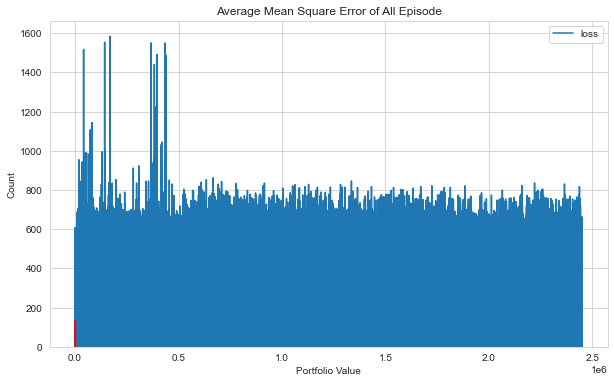

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

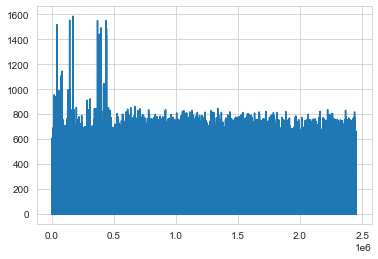

In [5]:
plt.plot(agent.model.losses)

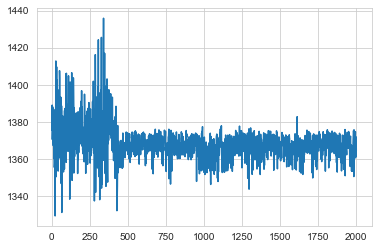

In [6]:
plt.plot(portfolio_value)

episode end value: 1106.79, duration: 0:00:00.136029
Sell: 374 times, Buy: 376 times


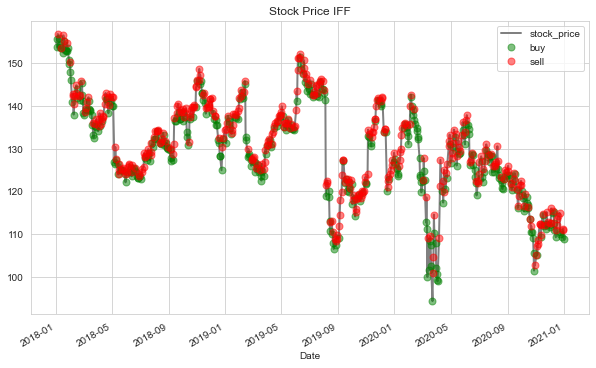

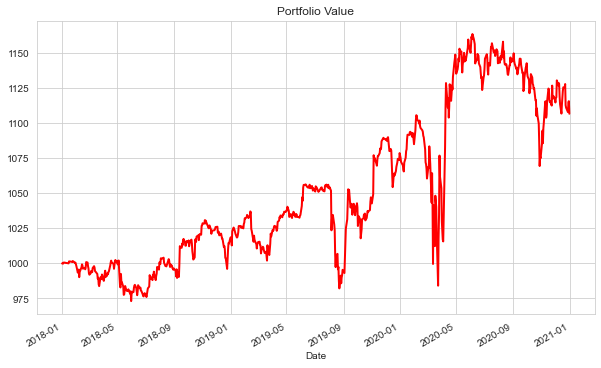

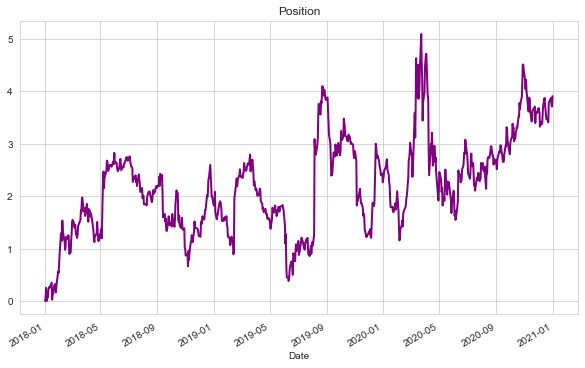

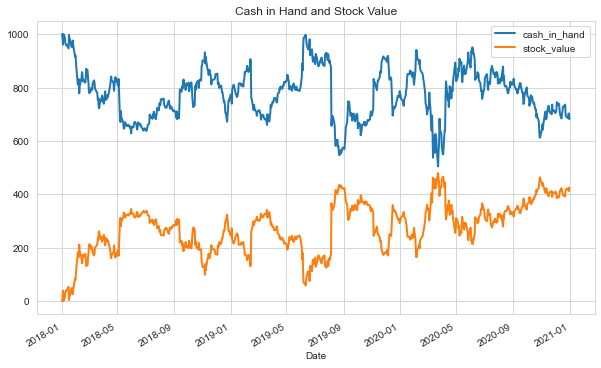

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: IFF
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 3.44 %
Volatility: 0.1020
shape ratio: 0.2294
Maximun drawdown: -11.00 %
Calmar ratio: 0.3128
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -11.03 %
Volatility (benchmark): 0.3230
shape ratio: -0.3757
Maximun drawdown: -39.90 %
Calmar ratio (benchmark): -0.2765


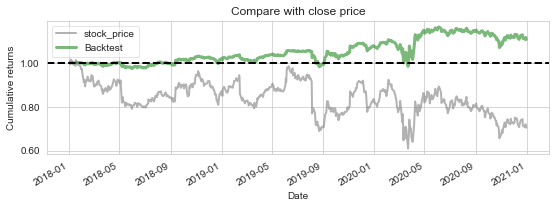

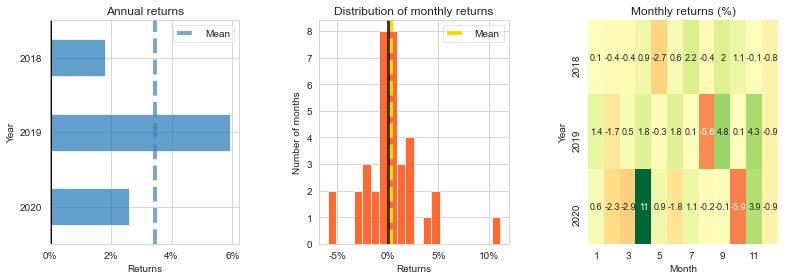

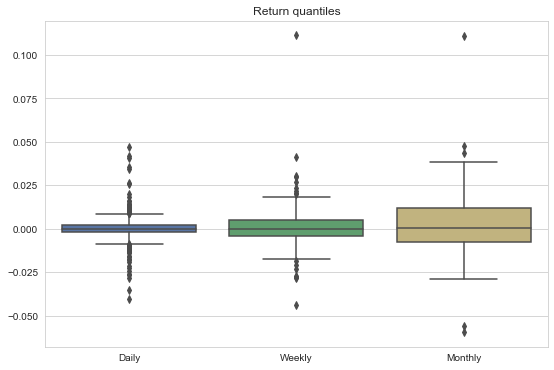

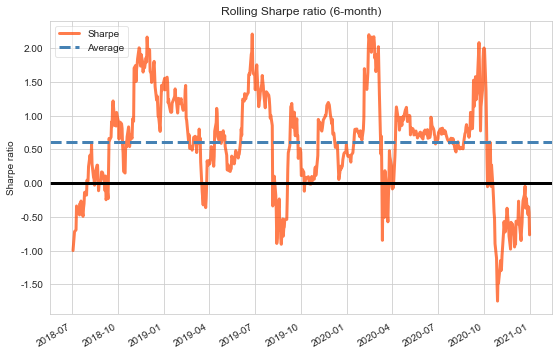

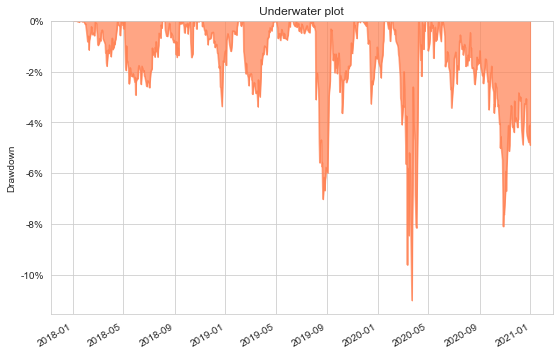

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')